# Building Good Training Sets – Data Preprocessing

Most contents of this article (or note) are from [*python machine learning - 2nd edition*](https://github.com/rasbt/python-machine-learning-book-2nd-edition).

## Dealing with missing data

## Identifying missing values in tabular data

First of all, creat a CSV file as a sample:

In [1]:
import pandas as pd
from io import StringIO
import sys

# note: do not add extra space in the csv_data
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## Eliminating samples or features with missing values

In [4]:
# remove rows that contain missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
# remove colums that contain missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# only drop rows that all colums are NaN
df.dropna(axis=0,how='all')
# or just:
# df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# drop rows that have less than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# only drop rows where NaN appear in specific colums (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values
Use interpolation technique.  
One of the most common method is mean interpolation, which is included in `scikit-learn` module as `Imputer`.

In [9]:
# imputing missing values via colums mean
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Handling categorical data

## Nominal and ordinal features

In [10]:
# creat a new DataFrame
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mapping ordinal features

We need to define the quantity relationships among feature sizes. Here we let $XL = L +1 = M +2$.  
Apparently, we also can transform them back.

In [11]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [12]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

We need to create a mapping dict to convert class labels from strings to integers.  
Reversing the class mapping is certainly allowed.

In [13]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [15]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


Additionally, it is convenient to use class `LabelEncoder` in scikit-learn module directly.

In [16]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [17]:
# reverse
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Performing one-hot encoding on nominal features

In [18]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

where:  
* blue=0
* green=1
* red=2  
However, there is a problem which is usually ignored. Although there is no quantity relationships between colors, the algorithm will assume that red > green > blue, which can get some useful results. But the results are not best.
<br/><br/>
**One-hot encoding:**  
A brief instrction: [What is one-hot encoding?](https://zhuanlan.zhihu.com/p/35287916)

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
# return dense array so that we can skip the toarry step

ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [21]:
# one-hot encoding via pandas

pd.get_dummies(df[['color', 'price', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [22]:
# multicollinearity guard in get_dummies
# 减少多重共线性

pd.get_dummies(df[['color', 'price', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [23]:
# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

# Partitioning a dataset into a seperate training and test set

Use a wine dataset:

In [24]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print("Class labels", np.unique(df_wine["Class label"]))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Split the data set into two totally different sets for training and testing with function `train_test_split()` in `scikit-learn`.

In [25]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

where:  
x - feature 1-13  
y - class label 1-3 (as is shown in the code block above), which is in the first column of the chart

# Bringing features onto the same scale

Normalization:
$$ x_{norm}^{(i)} = \frac{{x}^{(i)}-x_{min}}{x_{max}-x_{min}} $$

In [26]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_train_norm = mms.transform(X_test)

Standardization:
$$ x_{std}^{(i)} = \frac{x^{(i)}-\mu_{X}}{\sigma_{X}} $$

In [27]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

A visual example about normalization and standardization:

In [28]:
ex = np.array([0,1,2,3,4,5])

print('standardized: ', (ex - ex.mean()) / ex.std()) 

print('normalized: ', (ex-ex.min()) / (ex.max() - ex.min()))

standardized:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


# Selecting meaningful features

## L1 and L2 regularization as penalties against model complexity

* L1 norm:
$$ \left\| \boldsymbol{w} \right\|_1 = \sum_{j=1}^{m}|w_j| $$

* L2 norm:
$$ \left\| \boldsymbol{w} \right\|_2 = \sum_{j=1}^{m}w_j^2 $$

## A geometric interpretation of L2 regularization
...

## Sparse solutions with L1 regularization

For regularized models in `scikit-learn` that support L1 regularization, we can simply set the `penalty` parameter to 'l1' to obtain a sparse solution:

In [29]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Applied to the standardized Winedata:

In [30]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
# C=1.0 is the default.
# You can increase or decrease it
# to make the regularization effect stronger and weaker, respectively.

lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


c:\users\qszha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
lr.intercept_

array([-1.26373725, -1.21575383, -2.37020575])

In [32]:
lr.coef_

array([[ 1.24550531,  0.18011952,  0.74658545, -1.16440983,  0.        ,
         0.        ,  1.15957315,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55663708,  2.50895501],
       [-1.53747497, -0.3872516 , -0.99553741,  0.36514572, -0.05950856,
         0.        ,  0.66820031,  0.        ,  0.        , -1.934086  ,
         1.2337052 ,  0.        , -2.23105516],
       [ 0.13599931,  0.16829076,  0.35732233,  0.        ,  0.        ,
         0.        , -2.43761313,  0.        ,  0.        ,  1.56359389,
        -0.81932464, -0.49273832,  0.        ]])

The array above contains three rows of weight coefficients, each of which is a 13-dimensional weight vector.

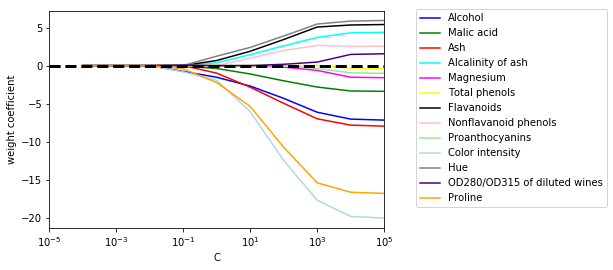

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='auto', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [40]:
import sklearn
sklearn.__version__

'0.21.3'